In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import img_to_array
from loader_util.preprocessing import AspectAwarePreprocessor, ImageToArrayPreprocessor
from loader_util.datasets import SimpleDatasetLoader
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from loader_util.nn.conv import LeNet
from imutils import paths
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes._axes as axes
import cv2
import os
sns.set()

In [8]:
dataFolder = r"/home/mhasan3/Desktop/WorkFolder/cellImages2/"

args = {
    'dataset': dataFolder
}

imagePaths = list(paths.list_images(args['dataset']))

In [9]:
# initialise the preprocessors
sp = AspectAwarePreprocessor(64, 64)
iap = ImageToArrayPreprocessor()

# load the dataset
sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
data, labels = sdl.load(imagePaths, verbose=500)
data = data.astype('float') / 255.0

[INFO] processed 500/1337
[INFO] processed 1000/1337


In [10]:
le = LabelEncoder().fit(labels)
labels = to_categorical(le.transform(labels), 3)
trainx, testx, trainy, testy = train_test_split(data, labels, test_size=0.2,
                                                random_state=42, stratify=labels)

# imbalance
classTotals = labels.sum(axis=0)
classWeight = classTotals.max() / classTotals

In [11]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                        horizontal_flip=True, vertical_flip=True, fill_mode="nearest")

In [12]:
cpt = ModelCheckpoint('best_model_weights.hdf5', monitor="val_accuracy", 
                      save_best_only=True,
                     verbose=1, mode='max')
callbacks = [cpt]

In [13]:
epoch_no = 2000
opt = SGD(lr=0.005)
model = LeNet.build(width=64, height=64, depth=3, classes=3)
model.compile(loss='categorical_crossentropy', optimizer=opt, 
              metrics=['accuracy'])
H = model.fit_generator(aug.flow(trainx, trainy, batch_size=32 ),
  validation_data=(testx, testy), steps_per_epoch=len (trainx) // 32 ,
  epochs=epoch_no , verbose=1, callbacks=callbacks) 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/2000
34/34 [==============================] - 2s 67ms/step - loss: 1.0967 - acc: 0.3564 - val_loss: 1.0905 - val_acc: 0.4813
Epoch 2/2000
34/34 [==============================] - 1s 22ms/step - loss: 1.0934 - acc: 0.3489 - val_loss: 1.0900 - val_acc: 0.3619
Epoch 3/2000
34/34 [==============================] - 1s 28ms/step - loss: 1.0909 - acc: 0.3573 - val_loss: 1.0877 - val_acc: 0.3433
Epoch 4/2000
34/34 [==============================] - 1s 29ms/step - loss: 1.0912 - acc: 0.3901 - val_loss: 1.0882 - val_acc: 0.3433
Epoch 5/2000
34/34 [==============================] - 1s 29ms/step - loss: 1.0899 - acc: 0.3545 - val_loss: 1.0852 - val_acc: 0.3619
Epoch 6/2000
34/34 [==============================] - 1s 30ms/step - loss: 1.0886 - acc: 0.3695 - val_loss: 1.0822 - val_acc: 0.3619
Epoch 7/2000
34/34 [==============================] - 1s 29ms/step - loss: 1.0874 

34/34 [==============================] - 1s 26ms/step - loss: 1.0718 - acc: 0.4163 - val_loss: 1.0608 - val_acc: 0.3619
Epoch 27/2000
34/34 [==============================] - 1s 26ms/step - loss: 1.0571 - acc: 0.4163 - val_loss: 1.0847 - val_acc: 0.3358
Epoch 28/2000
34/34 [==============================] - 1s 28ms/step - loss: 1.0577 - acc: 0.4687 - val_loss: 1.0583 - val_acc: 0.3619
Epoch 29/2000
34/34 [==============================] - 1s 27ms/step - loss: 1.0729 - acc: 0.3994 - val_loss: 1.0408 - val_acc: 0.6493
Epoch 30/2000
34/34 [==============================] - 1s 26ms/step - loss: 1.0592 - acc: 0.4144 - val_loss: 1.0289 - val_acc: 0.6866
Epoch 31/2000
34/34 [==============================] - 1s 26ms/step - loss: 1.0693 - acc: 0.4210 - val_loss: 1.0395 - val_acc: 0.3396
Epoch 32/2000
34/34 [==============================] - 1s 28ms/step - loss: 1.0681 - acc: 0.3863 - val_loss: 1.0838 - val_acc: 0.5485
Epoch 33/2000
34/34 [==============================] - 1s 27ms/step - loss: 

Epoch 53/2000
34/34 [==============================] - 1s 28ms/step - loss: 1.0550 - acc: 0.4256 - val_loss: 1.1486 - val_acc: 0.3619
Epoch 54/2000
34/34 [==============================] - 1s 26ms/step - loss: 1.0385 - acc: 0.4210 - val_loss: 1.0904 - val_acc: 0.3619
Epoch 55/2000
34/34 [==============================] - 1s 27ms/step - loss: 1.0466 - acc: 0.4238 - val_loss: 1.0091 - val_acc: 0.5261
Epoch 56/2000
34/34 [==============================] - 1s 27ms/step - loss: 1.0306 - acc: 0.4284 - val_loss: 1.0219 - val_acc: 0.4030
Epoch 57/2000
34/34 [==============================] - 1s 30ms/step - loss: 1.0543 - acc: 0.4238 - val_loss: 1.1382 - val_acc: 0.3619
Epoch 58/2000
34/34 [==============================] - 1s 31ms/step - loss: 1.0762 - acc: 0.3807 - val_loss: 1.0503 - val_acc: 0.4216
Epoch 59/2000
34/34 [==============================] - 1s 29ms/step - loss: 1.0541 - acc: 0.4397 - val_loss: 1.0460 - val_acc: 0.3619
Epoch 60/2000
34/34 [==============================] - 1s 38ms

Epoch 80/2000
34/34 [==============================] - 1s 28ms/step - loss: 1.0291 - acc: 0.4546 - val_loss: 0.9644 - val_acc: 0.4552
Epoch 81/2000
34/34 [==============================] - 1s 27ms/step - loss: 1.0004 - acc: 0.4677 - val_loss: 0.9992 - val_acc: 0.5560
Epoch 82/2000
34/34 [==============================] - 1s 28ms/step - loss: 1.0234 - acc: 0.4649 - val_loss: 0.9372 - val_acc: 0.6194
Epoch 83/2000
34/34 [==============================] - 1s 27ms/step - loss: 1.0482 - acc: 0.4546 - val_loss: 1.0151 - val_acc: 0.6978
Epoch 84/2000
34/34 [==============================] - 1s 28ms/step - loss: 1.0246 - acc: 0.4855 - val_loss: 0.9797 - val_acc: 0.6828
Epoch 85/2000
34/34 [==============================] - 1s 28ms/step - loss: 1.0162 - acc: 0.4715 - val_loss: 0.9949 - val_acc: 0.6269
Epoch 86/2000
34/34 [==============================] - 1s 27ms/step - loss: 1.0186 - acc: 0.4369 - val_loss: 0.9812 - val_acc: 0.3769
Epoch 87/2000
34/34 [==============================] - 1s 28ms

Epoch 107/2000
34/34 [==============================] - 1s 25ms/step - loss: 1.0093 - acc: 0.5136 - val_loss: 1.0163 - val_acc: 0.5746
Epoch 108/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.9781 - acc: 0.5510 - val_loss: 0.9207 - val_acc: 0.6791
Epoch 109/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.9661 - acc: 0.4855 - val_loss: 0.9739 - val_acc: 0.4627
Epoch 110/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.9348 - acc: 0.5538 - val_loss: 1.0194 - val_acc: 0.4067
Epoch 111/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.9420 - acc: 0.5931 - val_loss: 0.8917 - val_acc: 0.6716
Epoch 112/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.9422 - acc: 0.5005 - val_loss: 0.8868 - val_acc: 0.7910
Epoch 113/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.9190 - acc: 0.5659 - val_loss: 1.0476 - val_acc: 0.3619
Epoch 114/2000
34/34 [==============================] -

Epoch 134/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.8141 - acc: 0.6408 - val_loss: 0.9362 - val_acc: 0.3955
Epoch 135/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.8381 - acc: 0.5837 - val_loss: 0.7682 - val_acc: 0.7351
Epoch 136/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.9223 - acc: 0.5566 - val_loss: 1.0584 - val_acc: 0.3619
Epoch 137/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.8239 - acc: 0.6118 - val_loss: 0.8554 - val_acc: 0.5485
Epoch 138/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.8020 - acc: 0.6146 - val_loss: 0.7964 - val_acc: 0.6119
Epoch 139/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.8310 - acc: 0.5968 - val_loss: 0.7608 - val_acc: 0.7164
Epoch 140/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.7852 - acc: 0.6305 - val_loss: 0.7693 - val_acc: 0.6679
Epoch 141/2000
34/34 [==============================] -

Epoch 161/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.7124 - acc: 0.6754 - val_loss: 0.6635 - val_acc: 0.6642
Epoch 162/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.6992 - acc: 0.6717 - val_loss: 0.6614 - val_acc: 0.6978
Epoch 163/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.6648 - acc: 0.6913 - val_loss: 0.6960 - val_acc: 0.6306
Epoch 164/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.6830 - acc: 0.6604 - val_loss: 0.9811 - val_acc: 0.5187
Epoch 165/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.7194 - acc: 0.6473 - val_loss: 0.6592 - val_acc: 0.6866
Epoch 166/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.7395 - acc: 0.6464 - val_loss: 0.6405 - val_acc: 0.7239
Epoch 167/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.6728 - acc: 0.6782 - val_loss: 0.7710 - val_acc: 0.5821
Epoch 168/2000
34/34 [==============================] -

Epoch 188/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.5908 - acc: 0.7240 - val_loss: 0.5032 - val_acc: 0.8321
Epoch 189/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.6360 - acc: 0.6988 - val_loss: 0.5281 - val_acc: 0.7649
Epoch 190/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.5909 - acc: 0.7240 - val_loss: 0.7490 - val_acc: 0.5970
Epoch 191/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.6215 - acc: 0.7166 - val_loss: 1.0108 - val_acc: 0.4664
Epoch 192/2000
34/34 [==============================] - 1s 33ms/step - loss: 0.6137 - acc: 0.6969 - val_loss: 0.5346 - val_acc: 0.7948
Epoch 193/2000
34/34 [==============================] - 1s 33ms/step - loss: 0.7120 - acc: 0.6595 - val_loss: 1.4812 - val_acc: 0.3097
Epoch 194/2000
34/34 [==============================] - 1s 32ms/step - loss: 1.0264 - acc: 0.5201 - val_loss: 1.0554 - val_acc: 0.3321
Epoch 195/2000
34/34 [==============================] -

Epoch 215/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.5811 - acc: 0.7287 - val_loss: 0.5279 - val_acc: 0.7537
Epoch 216/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.6642 - acc: 0.6941 - val_loss: 0.4991 - val_acc: 0.8134
Epoch 217/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.5494 - acc: 0.7437 - val_loss: 0.5040 - val_acc: 0.7612
Epoch 218/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.5804 - acc: 0.7297 - val_loss: 0.6001 - val_acc: 0.6455
Epoch 219/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.5511 - acc: 0.7371 - val_loss: 0.5396 - val_acc: 0.7500
Epoch 220/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.5685 - acc: 0.7334 - val_loss: 0.6366 - val_acc: 0.6567
Epoch 221/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.5451 - acc: 0.7437 - val_loss: 0.6470 - val_acc: 0.6157
Epoch 222/2000
34/34 [==============================] -

Epoch 242/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.4699 - acc: 0.8120 - val_loss: 0.4412 - val_acc: 0.8246
Epoch 243/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.5400 - acc: 0.7493 - val_loss: 0.4417 - val_acc: 0.8134
Epoch 244/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.5476 - acc: 0.7465 - val_loss: 0.4357 - val_acc: 0.8246
Epoch 245/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.4961 - acc: 0.7802 - val_loss: 0.7349 - val_acc: 0.6082
Epoch 246/2000
34/34 [==============================] - 1s 24ms/step - loss: 0.6276 - acc: 0.7053 - val_loss: 0.4470 - val_acc: 0.8582
Epoch 247/2000
34/34 [==============================] - 1s 31ms/step - loss: 0.4916 - acc: 0.7848 - val_loss: 0.8504 - val_acc: 0.5933
Epoch 248/2000
34/34 [==============================] - 1s 33ms/step - loss: 0.5713 - acc: 0.7306 - val_loss: 0.4593 - val_acc: 0.7836
Epoch 249/2000
34/34 [==============================] -

Epoch 269/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.4798 - acc: 0.7933 - val_loss: 0.6108 - val_acc: 0.6642
Epoch 270/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.5718 - acc: 0.7596 - val_loss: 0.4444 - val_acc: 0.8172
Epoch 271/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.4728 - acc: 0.7867 - val_loss: 0.3897 - val_acc: 0.8657
Epoch 272/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.4771 - acc: 0.7867 - val_loss: 0.3724 - val_acc: 0.8657
Epoch 273/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.5813 - acc: 0.7278 - val_loss: 0.4446 - val_acc: 0.8209
Epoch 274/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.4505 - acc: 0.8120 - val_loss: 0.7584 - val_acc: 0.5784
Epoch 275/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.4588 - acc: 0.7989 - val_loss: 0.3946 - val_acc: 0.8507
Epoch 276/2000
34/34 [==============================] -

Epoch 296/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.4153 - acc: 0.8232 - val_loss: 0.3880 - val_acc: 0.7985
Epoch 297/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.4617 - acc: 0.8213 - val_loss: 0.4229 - val_acc: 0.8209
Epoch 298/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.5066 - acc: 0.7802 - val_loss: 0.3286 - val_acc: 0.8918
Epoch 299/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.4444 - acc: 0.8213 - val_loss: 0.3382 - val_acc: 0.8881
Epoch 300/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.3676 - acc: 0.8419 - val_loss: 0.5515 - val_acc: 0.7388
Epoch 301/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.4846 - acc: 0.7820 - val_loss: 0.5785 - val_acc: 0.7388
Epoch 302/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.4390 - acc: 0.8064 - val_loss: 0.3631 - val_acc: 0.8470
Epoch 303/2000
34/34 [==============================] -

Epoch 323/2000
34/34 [==============================] - 1s 33ms/step - loss: 0.3808 - acc: 0.8475 - val_loss: 0.6311 - val_acc: 0.7052
Epoch 324/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.4022 - acc: 0.8307 - val_loss: 0.4721 - val_acc: 0.7687
Epoch 325/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.3700 - acc: 0.8428 - val_loss: 0.4582 - val_acc: 0.7910
Epoch 326/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.3480 - acc: 0.8709 - val_loss: 0.3053 - val_acc: 0.8769
Epoch 327/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.4177 - acc: 0.8092 - val_loss: 0.2931 - val_acc: 0.9030
Epoch 328/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.3666 - acc: 0.8419 - val_loss: 0.4860 - val_acc: 0.8022
Epoch 329/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.4250 - acc: 0.8167 - val_loss: 0.5455 - val_acc: 0.7201
Epoch 330/2000
34/34 [==============================] -

Epoch 350/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.3732 - acc: 0.8419 - val_loss: 0.4689 - val_acc: 0.7388
Epoch 351/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.3774 - acc: 0.8503 - val_loss: 0.3929 - val_acc: 0.8731
Epoch 352/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.3869 - acc: 0.8466 - val_loss: 0.3310 - val_acc: 0.8657
Epoch 353/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.3634 - acc: 0.8391 - val_loss: 0.4088 - val_acc: 0.8097
Epoch 354/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.3832 - acc: 0.8344 - val_loss: 0.3630 - val_acc: 0.8731
Epoch 355/2000
34/34 [==============================] - 1s 31ms/step - loss: 0.3622 - acc: 0.8550 - val_loss: 0.2668 - val_acc: 0.9142
Epoch 356/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.3324 - acc: 0.8690 - val_loss: 1.1724 - val_acc: 0.6269
Epoch 357/2000
34/34 [==============================] -

Epoch 377/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.3861 - acc: 0.8391 - val_loss: 0.5316 - val_acc: 0.7201
Epoch 378/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.3137 - acc: 0.8756 - val_loss: 0.2976 - val_acc: 0.9030
Epoch 379/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.3332 - acc: 0.8513 - val_loss: 0.5060 - val_acc: 0.7463
Epoch 380/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.3398 - acc: 0.8644 - val_loss: 0.3210 - val_acc: 0.8806
Epoch 381/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.4135 - acc: 0.8316 - val_loss: 0.4249 - val_acc: 0.8396
Epoch 382/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.2884 - acc: 0.8906 - val_loss: 0.3644 - val_acc: 0.8284
Epoch 383/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.3185 - acc: 0.8569 - val_loss: 0.2760 - val_acc: 0.9067
Epoch 384/2000
34/34 [==============================] -

Epoch 404/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.3151 - acc: 0.8765 - val_loss: 0.7820 - val_acc: 0.6604
Epoch 405/2000
34/34 [==============================] - 1s 31ms/step - loss: 0.3495 - acc: 0.8513 - val_loss: 0.3269 - val_acc: 0.8843
Epoch 406/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.2915 - acc: 0.8775 - val_loss: 0.6673 - val_acc: 0.6903
Epoch 407/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.3878 - acc: 0.8213 - val_loss: 0.7802 - val_acc: 0.6567
Epoch 408/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.3406 - acc: 0.8587 - val_loss: 0.2427 - val_acc: 0.9291
Epoch 409/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.3211 - acc: 0.8784 - val_loss: 0.2415 - val_acc: 0.9291
Epoch 410/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.2903 - acc: 0.8868 - val_loss: 0.2467 - val_acc: 0.9179
Epoch 411/2000
34/34 [==============================] -

Epoch 431/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.4352 - acc: 0.8092 - val_loss: 0.8095 - val_acc: 0.6679
Epoch 432/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.2980 - acc: 0.8840 - val_loss: 0.3887 - val_acc: 0.8321
Epoch 433/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.2910 - acc: 0.8906 - val_loss: 0.2556 - val_acc: 0.9179
Epoch 434/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.2418 - acc: 0.9139 - val_loss: 0.9893 - val_acc: 0.6604
Epoch 435/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.3144 - acc: 0.8653 - val_loss: 0.8167 - val_acc: 0.6418
Epoch 436/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.3917 - acc: 0.8279 - val_loss: 0.2878 - val_acc: 0.9030
Epoch 437/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.2414 - acc: 0.9027 - val_loss: 0.7658 - val_acc: 0.6903
Epoch 438/2000
34/34 [==============================] -

Epoch 458/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.3411 - acc: 0.8569 - val_loss: 0.3906 - val_acc: 0.8321
Epoch 459/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.3491 - acc: 0.8597 - val_loss: 0.2597 - val_acc: 0.9328
Epoch 460/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.3248 - acc: 0.8775 - val_loss: 0.3010 - val_acc: 0.8918
Epoch 461/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.3223 - acc: 0.8803 - val_loss: 0.2450 - val_acc: 0.9254
Epoch 462/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.3516 - acc: 0.8447 - val_loss: 0.3509 - val_acc: 0.8619
Epoch 463/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.3046 - acc: 0.8728 - val_loss: 0.3129 - val_acc: 0.8321
Epoch 464/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.2511 - acc: 0.9008 - val_loss: 0.2127 - val_acc: 0.9328
Epoch 465/2000
34/34 [==============================] -

Epoch 485/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.2930 - acc: 0.8718 - val_loss: 0.2532 - val_acc: 0.9104
Epoch 486/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.2230 - acc: 0.9186 - val_loss: 0.4031 - val_acc: 0.7985
Epoch 487/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.2796 - acc: 0.8831 - val_loss: 0.5998 - val_acc: 0.7313
Epoch 488/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.4093 - acc: 0.8400 - val_loss: 0.2769 - val_acc: 0.8694
Epoch 489/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.2803 - acc: 0.8887 - val_loss: 0.6222 - val_acc: 0.7164
Epoch 490/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.3273 - acc: 0.8587 - val_loss: 0.2945 - val_acc: 0.8918
Epoch 491/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.2589 - acc: 0.8962 - val_loss: 0.2691 - val_acc: 0.8694
Epoch 492/2000
34/34 [==============================] -

Epoch 512/2000
34/34 [==============================] - 1s 34ms/step - loss: 0.2401 - acc: 0.8934 - val_loss: 0.2425 - val_acc: 0.9142
Epoch 513/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.3008 - acc: 0.8681 - val_loss: 0.4402 - val_acc: 0.8246
Epoch 514/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.2519 - acc: 0.8887 - val_loss: 0.3040 - val_acc: 0.8843
Epoch 515/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.2304 - acc: 0.9008 - val_loss: 0.2196 - val_acc: 0.9179
Epoch 516/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.2371 - acc: 0.9046 - val_loss: 0.6045 - val_acc: 0.7388
Epoch 517/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.3871 - acc: 0.8372 - val_loss: 0.2746 - val_acc: 0.8843
Epoch 518/2000
34/34 [==============================] - 1s 32ms/step - loss: 0.2921 - acc: 0.8718 - val_loss: 0.2840 - val_acc: 0.8657
Epoch 519/2000
34/34 [==============================] -

Epoch 539/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.2480 - acc: 0.9139 - val_loss: 0.2198 - val_acc: 0.9216
Epoch 540/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.4268 - acc: 0.8587 - val_loss: 0.3223 - val_acc: 0.8694
Epoch 541/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.3816 - acc: 0.8316 - val_loss: 0.3663 - val_acc: 0.8284
Epoch 542/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.2874 - acc: 0.8793 - val_loss: 0.5458 - val_acc: 0.7425
Epoch 543/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.3973 - acc: 0.8597 - val_loss: 0.2666 - val_acc: 0.9142
Epoch 544/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.2547 - acc: 0.8999 - val_loss: 0.7755 - val_acc: 0.6828
Epoch 545/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.2110 - acc: 0.9196 - val_loss: 0.3215 - val_acc: 0.8657
Epoch 546/2000
34/34 [==============================] -

Epoch 566/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.2256 - acc: 0.9111 - val_loss: 0.4199 - val_acc: 0.8172
Epoch 567/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.4113 - acc: 0.8400 - val_loss: 0.3100 - val_acc: 0.8507
Epoch 568/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.2101 - acc: 0.9242 - val_loss: 0.2577 - val_acc: 0.9104
Epoch 569/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.2444 - acc: 0.8971 - val_loss: 0.4531 - val_acc: 0.7724
Epoch 570/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.2051 - acc: 0.9270 - val_loss: 0.3215 - val_acc: 0.8545
Epoch 571/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.2714 - acc: 0.8924 - val_loss: 0.3052 - val_acc: 0.8657
Epoch 572/2000
34/34 [==============================] - 1s 32ms/step - loss: 0.3795 - acc: 0.8541 - val_loss: 0.3193 - val_acc: 0.8470
Epoch 573/2000
34/34 [==============================] -

Epoch 593/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.2127 - acc: 0.9233 - val_loss: 0.2769 - val_acc: 0.9030
Epoch 594/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.2482 - acc: 0.8962 - val_loss: 0.2021 - val_acc: 0.9328
Epoch 595/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.2272 - acc: 0.9027 - val_loss: 0.4844 - val_acc: 0.8060
Epoch 596/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.2592 - acc: 0.8896 - val_loss: 0.2226 - val_acc: 0.9067
Epoch 597/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.2367 - acc: 0.9083 - val_loss: 0.2128 - val_acc: 0.9067
Epoch 598/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.2447 - acc: 0.9102 - val_loss: 0.2737 - val_acc: 0.8694
Epoch 599/2000
34/34 [==============================] - 1s 23ms/step - loss: 0.2111 - acc: 0.9121 - val_loss: 0.3423 - val_acc: 0.8545
Epoch 600/2000
34/34 [==============================] -

Epoch 620/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.3124 - acc: 0.8634 - val_loss: 0.6964 - val_acc: 0.7313
Epoch 621/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1700 - acc: 0.9289 - val_loss: 0.2293 - val_acc: 0.9216
Epoch 622/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.2029 - acc: 0.9196 - val_loss: 0.2640 - val_acc: 0.8843
Epoch 623/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1746 - acc: 0.9308 - val_loss: 0.2057 - val_acc: 0.9254
Epoch 624/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.2189 - acc: 0.9093 - val_loss: 0.3644 - val_acc: 0.8507
Epoch 625/2000
34/34 [==============================] - 1s 35ms/step - loss: 0.2153 - acc: 0.9158 - val_loss: 0.2374 - val_acc: 0.9179
Epoch 626/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.2836 - acc: 0.8849 - val_loss: 0.3413 - val_acc: 0.8619
Epoch 627/2000
34/34 [==============================] -

Epoch 647/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.2109 - acc: 0.9121 - val_loss: 0.3485 - val_acc: 0.8694
Epoch 648/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.2228 - acc: 0.9149 - val_loss: 0.3113 - val_acc: 0.8881
Epoch 649/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1725 - acc: 0.9364 - val_loss: 0.2717 - val_acc: 0.9030
Epoch 650/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.1911 - acc: 0.9196 - val_loss: 0.2315 - val_acc: 0.8955
Epoch 651/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.3992 - acc: 0.8363 - val_loss: 0.3354 - val_acc: 0.8694
Epoch 652/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.1723 - acc: 0.9336 - val_loss: 0.3906 - val_acc: 0.8321
Epoch 653/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.2497 - acc: 0.8999 - val_loss: 0.1827 - val_acc: 0.9403
Epoch 654/2000
34/34 [==============================] -

Epoch 674/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.2726 - acc: 0.8915 - val_loss: 0.3179 - val_acc: 0.8582
Epoch 675/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.2845 - acc: 0.8821 - val_loss: 0.2245 - val_acc: 0.9179
Epoch 676/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.2282 - acc: 0.9018 - val_loss: 0.6848 - val_acc: 0.7425
Epoch 677/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.2031 - acc: 0.9158 - val_loss: 0.2474 - val_acc: 0.9104
Epoch 678/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1896 - acc: 0.9270 - val_loss: 0.3949 - val_acc: 0.8582
Epoch 679/2000
34/34 [==============================] - 1s 35ms/step - loss: 0.2084 - acc: 0.9167 - val_loss: 0.5470 - val_acc: 0.7351
Epoch 680/2000
34/34 [==============================] - 1s 37ms/step - loss: 0.2342 - acc: 0.9027 - val_loss: 0.2389 - val_acc: 0.8918
Epoch 681/2000
34/34 [==============================] -

Epoch 701/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.6404 - acc: 0.8138 - val_loss: 0.2354 - val_acc: 0.9216
Epoch 702/2000
34/34 [==============================] - 1s 44ms/step - loss: 0.2084 - acc: 0.9177 - val_loss: 0.2317 - val_acc: 0.9104
Epoch 703/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.2312 - acc: 0.9046 - val_loss: 0.2889 - val_acc: 0.8843
Epoch 704/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.2378 - acc: 0.8952 - val_loss: 0.3172 - val_acc: 0.8806
Epoch 705/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.2102 - acc: 0.9083 - val_loss: 0.3434 - val_acc: 0.8694
Epoch 706/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1883 - acc: 0.9270 - val_loss: 0.3012 - val_acc: 0.8955
Epoch 707/2000
34/34 [==============================] - 1s 34ms/step - loss: 0.2997 - acc: 0.8831 - val_loss: 0.3192 - val_acc: 0.8731
Epoch 708/2000
34/34 [==============================] -

Epoch 728/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.2642 - acc: 0.8812 - val_loss: 0.3387 - val_acc: 0.8358
Epoch 729/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.2037 - acc: 0.9167 - val_loss: 0.2156 - val_acc: 0.9216
Epoch 730/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1980 - acc: 0.9261 - val_loss: 0.2439 - val_acc: 0.9104
Epoch 731/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.1781 - acc: 0.9280 - val_loss: 0.7573 - val_acc: 0.7313
Epoch 732/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1873 - acc: 0.9280 - val_loss: 0.3852 - val_acc: 0.8507
Epoch 733/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.3122 - acc: 0.8859 - val_loss: 0.7013 - val_acc: 0.6903
Epoch 734/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.3164 - acc: 0.8541 - val_loss: 0.2170 - val_acc: 0.9291
Epoch 735/2000
34/34 [==============================] -

Epoch 755/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.2010 - acc: 0.9214 - val_loss: 0.3329 - val_acc: 0.8769
Epoch 756/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1781 - acc: 0.9355 - val_loss: 0.2386 - val_acc: 0.9216
Epoch 757/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1767 - acc: 0.9317 - val_loss: 0.2060 - val_acc: 0.9328
Epoch 758/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1801 - acc: 0.9355 - val_loss: 0.3448 - val_acc: 0.8881
Epoch 759/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1827 - acc: 0.9242 - val_loss: 0.5031 - val_acc: 0.7985
Epoch 760/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1857 - acc: 0.9298 - val_loss: 0.2017 - val_acc: 0.9328
Epoch 761/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1656 - acc: 0.9383 - val_loss: 0.7003 - val_acc: 0.7537
Epoch 762/2000
34/34 [==============================] -

Epoch 782/2000
34/34 [==============================] - 1s 35ms/step - loss: 0.1967 - acc: 0.9214 - val_loss: 0.2766 - val_acc: 0.8806
Epoch 783/2000
34/34 [==============================] - 1s 34ms/step - loss: 0.1757 - acc: 0.9224 - val_loss: 0.1926 - val_acc: 0.9291
Epoch 784/2000
34/34 [==============================] - 1s 32ms/step - loss: 0.1464 - acc: 0.9420 - val_loss: 0.2025 - val_acc: 0.9142
Epoch 785/2000
34/34 [==============================] - 1s 40ms/step - loss: 0.1815 - acc: 0.9383 - val_loss: 0.1608 - val_acc: 0.9590
Epoch 786/2000
34/34 [==============================] - 1s 43ms/step - loss: 0.1888 - acc: 0.9214 - val_loss: 0.5447 - val_acc: 0.7463
Epoch 787/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.2493 - acc: 0.9027 - val_loss: 0.2090 - val_acc: 0.9179
Epoch 788/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1861 - acc: 0.9252 - val_loss: 0.2005 - val_acc: 0.9254
Epoch 789/2000
34/34 [==============================] -

Epoch 809/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1744 - acc: 0.9308 - val_loss: 0.2516 - val_acc: 0.8881
Epoch 810/2000
34/34 [==============================] - 1s 32ms/step - loss: 0.1528 - acc: 0.9420 - val_loss: 0.1913 - val_acc: 0.9254
Epoch 811/2000
34/34 [==============================] - 2s 46ms/step - loss: 0.2566 - acc: 0.8952 - val_loss: 0.2600 - val_acc: 0.9067
Epoch 812/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.2706 - acc: 0.8887 - val_loss: 0.2424 - val_acc: 0.9067
Epoch 813/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1705 - acc: 0.9280 - val_loss: 0.1726 - val_acc: 0.9440
Epoch 814/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.2052 - acc: 0.9224 - val_loss: 0.4518 - val_acc: 0.8172
Epoch 815/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1842 - acc: 0.9280 - val_loss: 0.3139 - val_acc: 0.8769
Epoch 816/2000
34/34 [==============================] -

Epoch 836/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.2329 - acc: 0.9074 - val_loss: 0.2110 - val_acc: 0.9179
Epoch 837/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1820 - acc: 0.9317 - val_loss: 0.2365 - val_acc: 0.9030
Epoch 838/2000
34/34 [==============================] - 1s 39ms/step - loss: 0.2180 - acc: 0.9083 - val_loss: 0.2648 - val_acc: 0.8918
Epoch 839/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1523 - acc: 0.9308 - val_loss: 0.1945 - val_acc: 0.9328
Epoch 840/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.2026 - acc: 0.9130 - val_loss: 0.2585 - val_acc: 0.9142
Epoch 841/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1898 - acc: 0.9298 - val_loss: 0.4342 - val_acc: 0.8246
Epoch 842/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.2141 - acc: 0.9083 - val_loss: 0.1952 - val_acc: 0.9254
Epoch 843/2000
34/34 [==============================] -

Epoch 863/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.2168 - acc: 0.8999 - val_loss: 0.2899 - val_acc: 0.8694
Epoch 864/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1460 - acc: 0.9392 - val_loss: 0.3823 - val_acc: 0.8545
Epoch 865/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1393 - acc: 0.9523 - val_loss: 0.5593 - val_acc: 0.8097
Epoch 866/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.2235 - acc: 0.9102 - val_loss: 0.5040 - val_acc: 0.8134
Epoch 867/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.2632 - acc: 0.9111 - val_loss: 0.3433 - val_acc: 0.8582
Epoch 868/2000
34/34 [==============================] - 1s 34ms/step - loss: 0.2942 - acc: 0.8803 - val_loss: 0.2121 - val_acc: 0.9104
Epoch 869/2000
34/34 [==============================] - 1s 34ms/step - loss: 0.1597 - acc: 0.9476 - val_loss: 0.2547 - val_acc: 0.8993
Epoch 870/2000
34/34 [==============================] -

Epoch 890/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1448 - acc: 0.9514 - val_loss: 0.2016 - val_acc: 0.9366
Epoch 891/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1733 - acc: 0.9364 - val_loss: 0.7122 - val_acc: 0.7724
Epoch 892/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.2481 - acc: 0.8962 - val_loss: 0.2869 - val_acc: 0.8694
Epoch 893/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1621 - acc: 0.9345 - val_loss: 0.2082 - val_acc: 0.9216
Epoch 894/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1587 - acc: 0.9429 - val_loss: 0.2559 - val_acc: 0.9067
Epoch 895/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.2225 - acc: 0.9102 - val_loss: 0.2648 - val_acc: 0.8993
Epoch 896/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.3254 - acc: 0.8616 - val_loss: 0.3562 - val_acc: 0.8321
Epoch 897/2000
34/34 [==============================] -

Epoch 917/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1843 - acc: 0.9242 - val_loss: 0.1770 - val_acc: 0.9328
Epoch 918/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1391 - acc: 0.9429 - val_loss: 0.3173 - val_acc: 0.8769
Epoch 919/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.2271 - acc: 0.9083 - val_loss: 0.3278 - val_acc: 0.8769
Epoch 920/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1719 - acc: 0.9270 - val_loss: 0.2131 - val_acc: 0.9328
Epoch 921/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.2260 - acc: 0.9158 - val_loss: 0.6459 - val_acc: 0.7463
Epoch 922/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1696 - acc: 0.9289 - val_loss: 0.3947 - val_acc: 0.8545
Epoch 923/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.2714 - acc: 0.8962 - val_loss: 0.3863 - val_acc: 0.7985
Epoch 924/2000
34/34 [==============================] -

Epoch 944/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.2044 - acc: 0.9205 - val_loss: 0.3796 - val_acc: 0.8470
Epoch 945/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1620 - acc: 0.9429 - val_loss: 0.3695 - val_acc: 0.8470
Epoch 946/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1764 - acc: 0.9270 - val_loss: 0.2574 - val_acc: 0.8955
Epoch 947/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1980 - acc: 0.9149 - val_loss: 0.2516 - val_acc: 0.8843
Epoch 948/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1670 - acc: 0.9317 - val_loss: 0.3561 - val_acc: 0.8433
Epoch 949/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.2207 - acc: 0.9158 - val_loss: 0.2963 - val_acc: 0.8731
Epoch 950/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.2084 - acc: 0.9093 - val_loss: 0.2257 - val_acc: 0.9142
Epoch 951/2000
34/34 [==============================] -

Epoch 971/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1321 - acc: 0.9457 - val_loss: 0.2556 - val_acc: 0.9067
Epoch 972/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1598 - acc: 0.9345 - val_loss: 0.2581 - val_acc: 0.9142
Epoch 973/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.1596 - acc: 0.9298 - val_loss: 1.4249 - val_acc: 0.5858
Epoch 974/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1827 - acc: 0.9224 - val_loss: 0.1812 - val_acc: 0.9403
Epoch 975/2000
34/34 [==============================] - 1s 31ms/step - loss: 0.1976 - acc: 0.9214 - val_loss: 0.2121 - val_acc: 0.9366
Epoch 976/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1372 - acc: 0.9476 - val_loss: 0.1837 - val_acc: 0.9328
Epoch 977/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1447 - acc: 0.9429 - val_loss: 0.2408 - val_acc: 0.9216
Epoch 978/2000
34/34 [==============================] -

Epoch 998/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.1940 - acc: 0.9242 - val_loss: 0.2483 - val_acc: 0.9030
Epoch 999/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1647 - acc: 0.9345 - val_loss: 0.3329 - val_acc: 0.8657
Epoch 1000/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1418 - acc: 0.9401 - val_loss: 0.2910 - val_acc: 0.8843
Epoch 1001/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1550 - acc: 0.9392 - val_loss: 0.3490 - val_acc: 0.8507
Epoch 1002/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.2332 - acc: 0.9065 - val_loss: 0.2346 - val_acc: 0.9142
Epoch 1003/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1302 - acc: 0.9486 - val_loss: 0.1994 - val_acc: 0.9328
Epoch 1004/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1322 - acc: 0.9401 - val_loss: 0.2862 - val_acc: 0.8918
Epoch 1005/2000
34/34 [===========================

34/34 [==============================] - 1s 27ms/step - loss: 0.1939 - acc: 0.9177 - val_loss: 0.2958 - val_acc: 0.8769
Epoch 1025/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.2336 - acc: 0.9130 - val_loss: 0.4324 - val_acc: 0.8545
Epoch 1026/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1695 - acc: 0.9364 - val_loss: 0.1764 - val_acc: 0.9328
Epoch 1027/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1770 - acc: 0.9298 - val_loss: 0.2180 - val_acc: 0.9179
Epoch 1028/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1991 - acc: 0.9252 - val_loss: 0.1551 - val_acc: 0.9403
Epoch 1029/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1274 - acc: 0.9486 - val_loss: 0.2136 - val_acc: 0.9328
Epoch 1030/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1584 - acc: 0.9392 - val_loss: 0.2538 - val_acc: 0.9179
Epoch 1031/2000
34/34 [==============================] - 1s 27ms

34/34 [==============================] - 1s 26ms/step - loss: 0.1433 - acc: 0.9364 - val_loss: 0.3054 - val_acc: 0.8955
Epoch 1052/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.2051 - acc: 0.9224 - val_loss: 0.2875 - val_acc: 0.8657
Epoch 1053/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.2096 - acc: 0.9261 - val_loss: 0.3248 - val_acc: 0.8619
Epoch 1054/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1493 - acc: 0.9411 - val_loss: 0.2417 - val_acc: 0.9030
Epoch 1055/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1594 - acc: 0.9317 - val_loss: 0.4496 - val_acc: 0.8358
Epoch 1056/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1259 - acc: 0.9532 - val_loss: 0.1587 - val_acc: 0.9440
Epoch 1057/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1681 - acc: 0.9355 - val_loss: 0.4635 - val_acc: 0.8134
Epoch 1058/2000
34/34 [==============================] - 1s 31ms

Epoch 1078/2000
34/34 [==============================] - 1s 23ms/step - loss: 0.1148 - acc: 0.9560 - val_loss: 0.2595 - val_acc: 0.8918
Epoch 1079/2000
34/34 [==============================] - 1s 31ms/step - loss: 0.1373 - acc: 0.9495 - val_loss: 1.0279 - val_acc: 0.6604
Epoch 1080/2000
34/34 [==============================] - 1s 31ms/step - loss: 0.1414 - acc: 0.9411 - val_loss: 0.1472 - val_acc: 0.9403
Epoch 1081/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1403 - acc: 0.9457 - val_loss: 0.4675 - val_acc: 0.8209
Epoch 1082/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.1799 - acc: 0.9280 - val_loss: 0.3875 - val_acc: 0.8470
Epoch 1083/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1534 - acc: 0.9326 - val_loss: 0.2281 - val_acc: 0.9067
Epoch 1084/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1329 - acc: 0.9439 - val_loss: 0.2319 - val_acc: 0.9104
Epoch 1085/2000
34/34 [=========================

Epoch 1105/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1245 - acc: 0.9523 - val_loss: 0.1859 - val_acc: 0.9291
Epoch 1106/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1531 - acc: 0.9392 - val_loss: 0.4609 - val_acc: 0.7799
Epoch 1107/2000
34/34 [==============================] - 1s 32ms/step - loss: 0.1262 - acc: 0.9579 - val_loss: 0.2487 - val_acc: 0.8918
Epoch 1108/2000
34/34 [==============================] - 1s 24ms/step - loss: 0.1673 - acc: 0.9392 - val_loss: 0.5209 - val_acc: 0.8060
Epoch 1109/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1286 - acc: 0.9476 - val_loss: 0.1755 - val_acc: 0.9328
Epoch 1110/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1457 - acc: 0.9355 - val_loss: 0.2734 - val_acc: 0.8918
Epoch 1111/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1782 - acc: 0.9233 - val_loss: 0.2244 - val_acc: 0.9067
Epoch 1112/2000
34/34 [=========================

Epoch 1132/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1158 - acc: 0.9607 - val_loss: 0.3472 - val_acc: 0.8731
Epoch 1133/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1338 - acc: 0.9523 - val_loss: 0.2166 - val_acc: 0.9142
Epoch 1134/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.0987 - acc: 0.9635 - val_loss: 0.2049 - val_acc: 0.9216
Epoch 1135/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1845 - acc: 0.9392 - val_loss: 0.5401 - val_acc: 0.8470
Epoch 1136/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.2257 - acc: 0.9130 - val_loss: 0.4760 - val_acc: 0.7836
Epoch 1137/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1789 - acc: 0.9224 - val_loss: 0.2907 - val_acc: 0.8806
Epoch 1138/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1966 - acc: 0.9177 - val_loss: 0.3943 - val_acc: 0.8246
Epoch 1139/2000
34/34 [=========================

Epoch 1159/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1175 - acc: 0.9570 - val_loss: 0.2551 - val_acc: 0.9030
Epoch 1160/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1407 - acc: 0.9373 - val_loss: 0.1481 - val_acc: 0.9403
Epoch 1161/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1028 - acc: 0.9663 - val_loss: 0.2282 - val_acc: 0.9030
Epoch 1162/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1179 - acc: 0.9551 - val_loss: 0.2287 - val_acc: 0.9179
Epoch 1163/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1621 - acc: 0.9355 - val_loss: 0.2002 - val_acc: 0.9328
Epoch 1164/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1362 - acc: 0.9467 - val_loss: 0.1909 - val_acc: 0.9254
Epoch 1165/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1459 - acc: 0.9467 - val_loss: 0.3255 - val_acc: 0.8694
Epoch 1166/2000
34/34 [=========================

Epoch 1186/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.2729 - acc: 0.8971 - val_loss: 0.2151 - val_acc: 0.9291
Epoch 1187/2000
34/34 [==============================] - 1s 31ms/step - loss: 0.1796 - acc: 0.9326 - val_loss: 0.3513 - val_acc: 0.8396
Epoch 1188/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1662 - acc: 0.9289 - val_loss: 0.4038 - val_acc: 0.8396
Epoch 1189/2000
34/34 [==============================] - 1s 24ms/step - loss: 0.2086 - acc: 0.9121 - val_loss: 0.2779 - val_acc: 0.8843
Epoch 1190/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1612 - acc: 0.9401 - val_loss: 0.7052 - val_acc: 0.7388
Epoch 1191/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1597 - acc: 0.9355 - val_loss: 0.2812 - val_acc: 0.8769
Epoch 1192/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1914 - acc: 0.9233 - val_loss: 0.5069 - val_acc: 0.7799
Epoch 1193/2000
34/34 [=========================

Epoch 1213/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1308 - acc: 0.9514 - val_loss: 0.3312 - val_acc: 0.8545
Epoch 1214/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1439 - acc: 0.9383 - val_loss: 0.2599 - val_acc: 0.8881
Epoch 1215/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1312 - acc: 0.9504 - val_loss: 0.1565 - val_acc: 0.9403
Epoch 1216/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.1444 - acc: 0.9420 - val_loss: 0.1359 - val_acc: 0.9403
Epoch 1217/2000
34/34 [==============================] - 1s 31ms/step - loss: 0.1401 - acc: 0.9476 - val_loss: 0.3607 - val_acc: 0.8619
Epoch 1218/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1282 - acc: 0.9504 - val_loss: 0.3290 - val_acc: 0.8731
Epoch 1219/2000
34/34 [==============================] - 1s 24ms/step - loss: 0.2208 - acc: 0.9121 - val_loss: 0.9248 - val_acc: 0.6940
Epoch 1220/2000
34/34 [=========================

Epoch 1240/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1347 - acc: 0.9476 - val_loss: 0.2162 - val_acc: 0.9291
Epoch 1241/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1387 - acc: 0.9486 - val_loss: 0.3549 - val_acc: 0.8657
Epoch 1242/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.2542 - acc: 0.9093 - val_loss: 0.2178 - val_acc: 0.9254
Epoch 1243/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1438 - acc: 0.9448 - val_loss: 0.2710 - val_acc: 0.8806
Epoch 1244/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1101 - acc: 0.9588 - val_loss: 0.2395 - val_acc: 0.9179
Epoch 1245/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.1535 - acc: 0.9467 - val_loss: 0.3812 - val_acc: 0.8806
Epoch 1246/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1743 - acc: 0.9345 - val_loss: 0.3710 - val_acc: 0.8284
Epoch 1247/2000
34/34 [=========================

Epoch 1267/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1579 - acc: 0.9373 - val_loss: 0.3741 - val_acc: 0.8806
Epoch 1268/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1688 - acc: 0.9345 - val_loss: 0.2240 - val_acc: 0.9104
Epoch 1269/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1051 - acc: 0.9607 - val_loss: 0.1995 - val_acc: 0.9142
Epoch 1270/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1097 - acc: 0.9579 - val_loss: 0.1567 - val_acc: 0.9440
Epoch 1271/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1415 - acc: 0.9411 - val_loss: 0.2239 - val_acc: 0.9291
Epoch 1272/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1491 - acc: 0.9364 - val_loss: 0.3241 - val_acc: 0.8806
Epoch 1273/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.0926 - acc: 0.9588 - val_loss: 0.1336 - val_acc: 0.9478
Epoch 1274/2000
34/34 [=========================

Epoch 1294/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1279 - acc: 0.9467 - val_loss: 0.5376 - val_acc: 0.8134
Epoch 1295/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1192 - acc: 0.9514 - val_loss: 0.2727 - val_acc: 0.9067
Epoch 1296/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.0961 - acc: 0.9598 - val_loss: 0.2499 - val_acc: 0.9067
Epoch 1297/2000
34/34 [==============================] - 1s 35ms/step - loss: 0.4842 - acc: 0.8354 - val_loss: 0.3502 - val_acc: 0.8507
Epoch 1298/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.1836 - acc: 0.9233 - val_loss: 0.3824 - val_acc: 0.8358
Epoch 1299/2000
34/34 [==============================] - 1s 34ms/step - loss: 0.1499 - acc: 0.9401 - val_loss: 0.3202 - val_acc: 0.8843
Epoch 1300/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1344 - acc: 0.9514 - val_loss: 0.3088 - val_acc: 0.8881
Epoch 1301/2000
34/34 [=========================

Epoch 1321/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1463 - acc: 0.9429 - val_loss: 0.2736 - val_acc: 0.9104
Epoch 1322/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1650 - acc: 0.9439 - val_loss: 0.2614 - val_acc: 0.9030
Epoch 1323/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1460 - acc: 0.9401 - val_loss: 0.2218 - val_acc: 0.9179
Epoch 1324/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1191 - acc: 0.9542 - val_loss: 0.3603 - val_acc: 0.8619
Epoch 1325/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1325 - acc: 0.9448 - val_loss: 0.2248 - val_acc: 0.9179
Epoch 1326/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1130 - acc: 0.9579 - val_loss: 0.1607 - val_acc: 0.9478
Epoch 1327/2000
34/34 [==============================] - 1s 32ms/step - loss: 0.1330 - acc: 0.9429 - val_loss: 0.2468 - val_acc: 0.9142
Epoch 1328/2000
34/34 [=========================

Epoch 1348/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.3626 - acc: 0.8924 - val_loss: 0.4051 - val_acc: 0.8321
Epoch 1349/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.2849 - acc: 0.8784 - val_loss: 0.2783 - val_acc: 0.8918
Epoch 1350/2000
34/34 [==============================] - 1s 31ms/step - loss: 0.3007 - acc: 0.8831 - val_loss: 0.2980 - val_acc: 0.8843
Epoch 1351/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.2744 - acc: 0.8943 - val_loss: 0.2010 - val_acc: 0.9216
Epoch 1352/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.2413 - acc: 0.8999 - val_loss: 0.2476 - val_acc: 0.9030
Epoch 1353/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.2215 - acc: 0.9149 - val_loss: 0.3082 - val_acc: 0.8769
Epoch 1354/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1828 - acc: 0.9242 - val_loss: 0.6180 - val_acc: 0.7575
Epoch 1355/2000
34/34 [=========================

Epoch 1375/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1656 - acc: 0.9336 - val_loss: 0.3859 - val_acc: 0.8284
Epoch 1376/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1578 - acc: 0.9355 - val_loss: 0.2984 - val_acc: 0.8769
Epoch 1377/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1357 - acc: 0.9467 - val_loss: 0.1846 - val_acc: 0.9328
Epoch 1378/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.2721 - acc: 0.8943 - val_loss: 0.4626 - val_acc: 0.7836
Epoch 1379/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1750 - acc: 0.9317 - val_loss: 0.3613 - val_acc: 0.8507
Epoch 1380/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1891 - acc: 0.9149 - val_loss: 0.2766 - val_acc: 0.8918
Epoch 1381/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1657 - acc: 0.9317 - val_loss: 0.2125 - val_acc: 0.9216
Epoch 1382/2000
34/34 [=========================

Epoch 1402/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1667 - acc: 0.9326 - val_loss: 0.2750 - val_acc: 0.8955
Epoch 1403/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1393 - acc: 0.9560 - val_loss: 0.2681 - val_acc: 0.8918
Epoch 1404/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1564 - acc: 0.9439 - val_loss: 0.2002 - val_acc: 0.9254
Epoch 1405/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1308 - acc: 0.9504 - val_loss: 0.2193 - val_acc: 0.9104
Epoch 1406/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1876 - acc: 0.9308 - val_loss: 0.6264 - val_acc: 0.7724
Epoch 1407/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1601 - acc: 0.9364 - val_loss: 0.3917 - val_acc: 0.8507
Epoch 1408/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1365 - acc: 0.9523 - val_loss: 0.2282 - val_acc: 0.9067
Epoch 1409/2000
34/34 [=========================

Epoch 1429/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1778 - acc: 0.9345 - val_loss: 0.2098 - val_acc: 0.8918
Epoch 1430/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1320 - acc: 0.9457 - val_loss: 0.2886 - val_acc: 0.8731
Epoch 1431/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1466 - acc: 0.9448 - val_loss: 0.1349 - val_acc: 0.9478
Epoch 1432/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1414 - acc: 0.9467 - val_loss: 0.3460 - val_acc: 0.8545
Epoch 1433/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1386 - acc: 0.9467 - val_loss: 0.3443 - val_acc: 0.8769
Epoch 1434/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1443 - acc: 0.9411 - val_loss: 0.2768 - val_acc: 0.8955
Epoch 1435/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1508 - acc: 0.9392 - val_loss: 0.4514 - val_acc: 0.8358
Epoch 1436/2000
34/34 [=========================

Epoch 1456/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1114 - acc: 0.9588 - val_loss: 0.1547 - val_acc: 0.9440
Epoch 1457/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1464 - acc: 0.9429 - val_loss: 0.3834 - val_acc: 0.8470
Epoch 1458/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.2318 - acc: 0.9027 - val_loss: 0.2381 - val_acc: 0.9142
Epoch 1459/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1414 - acc: 0.9486 - val_loss: 0.3246 - val_acc: 0.8731
Epoch 1460/2000
34/34 [==============================] - 1s 34ms/step - loss: 0.1256 - acc: 0.9495 - val_loss: 0.2012 - val_acc: 0.9067
Epoch 1461/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.1790 - acc: 0.9326 - val_loss: 0.9514 - val_acc: 0.7015
Epoch 1462/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1888 - acc: 0.9233 - val_loss: 0.3748 - val_acc: 0.8545
Epoch 1463/2000
34/34 [=========================

Epoch 1483/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1223 - acc: 0.9551 - val_loss: 0.4312 - val_acc: 0.8284
Epoch 1484/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1286 - acc: 0.9514 - val_loss: 0.1592 - val_acc: 0.9366
Epoch 1485/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1311 - acc: 0.9514 - val_loss: 0.1523 - val_acc: 0.9366
Epoch 1486/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1379 - acc: 0.9448 - val_loss: 0.2119 - val_acc: 0.9067
Epoch 1487/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1923 - acc: 0.9326 - val_loss: 0.2512 - val_acc: 0.9142
Epoch 1488/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1290 - acc: 0.9467 - val_loss: 0.3073 - val_acc: 0.8694
Epoch 1489/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1635 - acc: 0.9373 - val_loss: 0.2795 - val_acc: 0.8993
Epoch 1490/2000
34/34 [=========================

34/34 [==============================] - 1s 29ms/step - loss: 0.1429 - acc: 0.9504 - val_loss: 0.2395 - val_acc: 0.9142
Epoch 1510/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1360 - acc: 0.9457 - val_loss: 0.1921 - val_acc: 0.9254
Epoch 1511/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1912 - acc: 0.9252 - val_loss: 0.2505 - val_acc: 0.9104
Epoch 1512/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1100 - acc: 0.9579 - val_loss: 0.2291 - val_acc: 0.9104
Epoch 1513/2000
34/34 [==============================] - 1s 31ms/step - loss: 0.1152 - acc: 0.9542 - val_loss: 0.1445 - val_acc: 0.9366
Epoch 1514/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1695 - acc: 0.9364 - val_loss: 0.1713 - val_acc: 0.9478
Epoch 1515/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1220 - acc: 0.9551 - val_loss: 0.2186 - val_acc: 0.9179
Epoch 1516/2000
34/34 [==============================] - 1s 31ms

34/34 [==============================] - 1s 24ms/step - loss: 0.1520 - acc: 0.9420 - val_loss: 0.1947 - val_acc: 0.9291
Epoch 1537/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1030 - acc: 0.9607 - val_loss: 0.3190 - val_acc: 0.8955
Epoch 1538/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1185 - acc: 0.9532 - val_loss: 0.1621 - val_acc: 0.9328
Epoch 1539/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1455 - acc: 0.9373 - val_loss: 0.2513 - val_acc: 0.9179
Epoch 1540/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1500 - acc: 0.9401 - val_loss: 0.4318 - val_acc: 0.8284
Epoch 1541/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1122 - acc: 0.9570 - val_loss: 0.3473 - val_acc: 0.8843
Epoch 1542/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1251 - acc: 0.9495 - val_loss: 0.1711 - val_acc: 0.9291
Epoch 1543/2000
34/34 [==============================] - 1s 28ms

Epoch 1563/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1113 - acc: 0.9542 - val_loss: 0.1395 - val_acc: 0.9515
Epoch 1564/2000
34/34 [==============================] - 1s 24ms/step - loss: 0.1200 - acc: 0.9495 - val_loss: 0.1704 - val_acc: 0.9291
Epoch 1565/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1160 - acc: 0.9579 - val_loss: 0.1613 - val_acc: 0.9328
Epoch 1566/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1535 - acc: 0.9448 - val_loss: 0.2184 - val_acc: 0.9179
Epoch 1567/2000
34/34 [==============================] - 1s 31ms/step - loss: 0.1057 - acc: 0.9645 - val_loss: 0.4887 - val_acc: 0.8433
Epoch 1568/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1524 - acc: 0.9383 - val_loss: 0.1802 - val_acc: 0.9291
Epoch 1569/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.0958 - acc: 0.9635 - val_loss: 0.2898 - val_acc: 0.9104
Epoch 1570/2000
34/34 [=========================

Epoch 1590/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.3654 - acc: 0.8924 - val_loss: 0.1624 - val_acc: 0.9328
Epoch 1591/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1551 - acc: 0.9401 - val_loss: 0.1924 - val_acc: 0.9254
Epoch 1592/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1211 - acc: 0.9551 - val_loss: 0.2389 - val_acc: 0.9067
Epoch 1593/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1435 - acc: 0.9364 - val_loss: 0.2222 - val_acc: 0.9179
Epoch 1594/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1050 - acc: 0.9607 - val_loss: 0.2303 - val_acc: 0.9030
Epoch 1595/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1153 - acc: 0.9504 - val_loss: 0.2343 - val_acc: 0.9104
Epoch 1596/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1259 - acc: 0.9504 - val_loss: 0.2227 - val_acc: 0.9067
Epoch 1597/2000
34/34 [=========================

Epoch 1617/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1323 - acc: 0.9364 - val_loss: 0.1892 - val_acc: 0.9291
Epoch 1618/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1803 - acc: 0.9373 - val_loss: 0.3464 - val_acc: 0.8582
Epoch 1619/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1098 - acc: 0.9560 - val_loss: 0.2003 - val_acc: 0.9291
Epoch 1620/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1001 - acc: 0.9579 - val_loss: 0.2083 - val_acc: 0.9142
Epoch 1621/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1074 - acc: 0.9635 - val_loss: 0.2322 - val_acc: 0.9179
Epoch 1622/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1274 - acc: 0.9542 - val_loss: 0.2456 - val_acc: 0.9067
Epoch 1623/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.2677 - acc: 0.9055 - val_loss: 0.3639 - val_acc: 0.8619
Epoch 1624/2000
34/34 [=========================

Epoch 1644/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1063 - acc: 0.9645 - val_loss: 0.2369 - val_acc: 0.9254
Epoch 1645/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1499 - acc: 0.9364 - val_loss: 0.2753 - val_acc: 0.9030
Epoch 1646/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1247 - acc: 0.9523 - val_loss: 0.2999 - val_acc: 0.9067
Epoch 1647/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1013 - acc: 0.9598 - val_loss: 0.5258 - val_acc: 0.7836
Epoch 1648/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1067 - acc: 0.9551 - val_loss: 0.1157 - val_acc: 0.9552
Epoch 1649/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.3493 - acc: 0.8906 - val_loss: 0.4104 - val_acc: 0.8246
Epoch 1650/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1207 - acc: 0.9542 - val_loss: 0.2616 - val_acc: 0.9179
Epoch 1651/2000
34/34 [=========================

Epoch 1671/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.0839 - acc: 0.9719 - val_loss: 0.1914 - val_acc: 0.9328
Epoch 1672/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1092 - acc: 0.9588 - val_loss: 0.3257 - val_acc: 0.8806
Epoch 1673/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1060 - acc: 0.9588 - val_loss: 0.2466 - val_acc: 0.9104
Epoch 1674/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1778 - acc: 0.9373 - val_loss: 0.2449 - val_acc: 0.9067
Epoch 1675/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.0947 - acc: 0.9616 - val_loss: 0.4507 - val_acc: 0.8321
Epoch 1676/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1022 - acc: 0.9654 - val_loss: 0.2325 - val_acc: 0.9179
Epoch 1677/2000
34/34 [==============================] - 1s 33ms/step - loss: 0.1059 - acc: 0.9616 - val_loss: 0.3327 - val_acc: 0.8769
Epoch 1678/2000
34/34 [=========================

Epoch 1698/2000
34/34 [==============================] - 1s 33ms/step - loss: 0.1005 - acc: 0.9654 - val_loss: 0.2835 - val_acc: 0.8881
Epoch 1699/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1120 - acc: 0.9532 - val_loss: 0.2001 - val_acc: 0.9179
Epoch 1700/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.0961 - acc: 0.9710 - val_loss: 0.2311 - val_acc: 0.9179
Epoch 1701/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1053 - acc: 0.9616 - val_loss: 0.3325 - val_acc: 0.8806
Epoch 1702/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.0791 - acc: 0.9775 - val_loss: 0.1792 - val_acc: 0.9366
Epoch 1703/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.0909 - acc: 0.9710 - val_loss: 0.3198 - val_acc: 0.8806
Epoch 1704/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.2664 - acc: 0.9177 - val_loss: 0.3291 - val_acc: 0.8731
Epoch 1705/2000
34/34 [=========================

Epoch 1725/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1021 - acc: 0.9626 - val_loss: 0.3218 - val_acc: 0.8955
Epoch 1726/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1109 - acc: 0.9635 - val_loss: 0.1932 - val_acc: 0.9291
Epoch 1727/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1135 - acc: 0.9551 - val_loss: 0.2246 - val_acc: 0.9142
Epoch 1728/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1011 - acc: 0.9579 - val_loss: 0.3658 - val_acc: 0.8694
Epoch 1729/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1143 - acc: 0.9570 - val_loss: 0.4572 - val_acc: 0.8545
Epoch 1730/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1179 - acc: 0.9579 - val_loss: 0.1444 - val_acc: 0.9590
Epoch 1731/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1061 - acc: 0.9579 - val_loss: 0.2066 - val_acc: 0.9254
Epoch 1732/2000
34/34 [=========================

Epoch 1752/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.2199 - acc: 0.9270 - val_loss: 0.1863 - val_acc: 0.9328
Epoch 1753/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1019 - acc: 0.9579 - val_loss: 0.8584 - val_acc: 0.7761
Epoch 1754/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.2171 - acc: 0.9270 - val_loss: 0.2249 - val_acc: 0.9179
Epoch 1755/2000
34/34 [==============================] - 1s 34ms/step - loss: 0.0993 - acc: 0.9598 - val_loss: 0.1674 - val_acc: 0.9328
Epoch 1756/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.1354 - acc: 0.9523 - val_loss: 0.3141 - val_acc: 0.8881
Epoch 1757/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1177 - acc: 0.9570 - val_loss: 0.1696 - val_acc: 0.9403
Epoch 1758/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1025 - acc: 0.9607 - val_loss: 0.2020 - val_acc: 0.9291
Epoch 1759/2000
34/34 [=========================

Epoch 1779/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.0918 - acc: 0.9607 - val_loss: 0.4621 - val_acc: 0.8396
Epoch 1780/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1092 - acc: 0.9616 - val_loss: 0.3614 - val_acc: 0.8806
Epoch 1781/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.2166 - acc: 0.9205 - val_loss: 0.2659 - val_acc: 0.9030
Epoch 1782/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.0859 - acc: 0.9710 - val_loss: 0.2417 - val_acc: 0.9142
Epoch 1783/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1090 - acc: 0.9579 - val_loss: 0.1814 - val_acc: 0.9254
Epoch 1784/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.0954 - acc: 0.9626 - val_loss: 0.2602 - val_acc: 0.9067
Epoch 1785/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.1007 - acc: 0.9673 - val_loss: 0.1123 - val_acc: 0.9552
Epoch 1786/2000
34/34 [=========================

Epoch 1806/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.0863 - acc: 0.9757 - val_loss: 0.2128 - val_acc: 0.9216
Epoch 1807/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.0994 - acc: 0.9579 - val_loss: 0.1321 - val_acc: 0.9515
Epoch 1808/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.0888 - acc: 0.9719 - val_loss: 0.2769 - val_acc: 0.9067
Epoch 1809/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1324 - acc: 0.9542 - val_loss: 0.5015 - val_acc: 0.8321
Epoch 1810/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.0925 - acc: 0.9616 - val_loss: 0.1659 - val_acc: 0.9328
Epoch 1811/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1475 - acc: 0.9383 - val_loss: 0.4490 - val_acc: 0.8172
Epoch 1812/2000
34/34 [==============================] - 1s 32ms/step - loss: 0.0947 - acc: 0.9635 - val_loss: 0.1961 - val_acc: 0.9328
Epoch 1813/2000
34/34 [=========================

Epoch 1833/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1655 - acc: 0.9411 - val_loss: 0.2873 - val_acc: 0.8881
Epoch 1834/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.1107 - acc: 0.9635 - val_loss: 0.4254 - val_acc: 0.8433
Epoch 1835/2000
34/34 [==============================] - 1s 31ms/step - loss: 0.1133 - acc: 0.9588 - val_loss: 0.4834 - val_acc: 0.7985
Epoch 1836/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1009 - acc: 0.9598 - val_loss: 0.2788 - val_acc: 0.9067
Epoch 1837/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.0802 - acc: 0.9673 - val_loss: 0.3857 - val_acc: 0.8731
Epoch 1838/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1125 - acc: 0.9560 - val_loss: 0.2224 - val_acc: 0.9179
Epoch 1839/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1101 - acc: 0.9514 - val_loss: 0.1479 - val_acc: 0.9440
Epoch 1840/2000
34/34 [=========================

Epoch 1860/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1161 - acc: 0.9495 - val_loss: 0.1759 - val_acc: 0.9440
Epoch 1861/2000
34/34 [==============================] - 1s 33ms/step - loss: 0.0929 - acc: 0.9645 - val_loss: 0.3629 - val_acc: 0.8843
Epoch 1862/2000
34/34 [==============================] - 1s 24ms/step - loss: 0.1066 - acc: 0.9663 - val_loss: 0.6089 - val_acc: 0.7985
Epoch 1863/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1402 - acc: 0.9457 - val_loss: 0.2568 - val_acc: 0.9142
Epoch 1864/2000
34/34 [==============================] - 1s 32ms/step - loss: 0.0892 - acc: 0.9663 - val_loss: 0.2518 - val_acc: 0.9030
Epoch 1865/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.0839 - acc: 0.9635 - val_loss: 0.1968 - val_acc: 0.9254
Epoch 1866/2000
34/34 [==============================] - 1s 31ms/step - loss: 0.0960 - acc: 0.9616 - val_loss: 0.2699 - val_acc: 0.9104
Epoch 1867/2000
34/34 [=========================

Epoch 1887/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.0970 - acc: 0.9654 - val_loss: 0.1370 - val_acc: 0.9590
Epoch 1888/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1304 - acc: 0.9514 - val_loss: 0.1548 - val_acc: 0.9440
Epoch 1889/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1034 - acc: 0.9616 - val_loss: 0.2611 - val_acc: 0.9067
Epoch 1890/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1154 - acc: 0.9560 - val_loss: 0.1401 - val_acc: 0.9515
Epoch 1891/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.0882 - acc: 0.9719 - val_loss: 0.2466 - val_acc: 0.9104
Epoch 1892/2000
34/34 [==============================] - 1s 31ms/step - loss: 0.0829 - acc: 0.9635 - val_loss: 0.1942 - val_acc: 0.9403
Epoch 1893/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.0788 - acc: 0.9673 - val_loss: 0.4953 - val_acc: 0.8284
Epoch 1894/2000
34/34 [=========================

Epoch 1914/2000
34/34 [==============================] - 1s 25ms/step - loss: 0.0835 - acc: 0.9691 - val_loss: 0.4887 - val_acc: 0.8246
Epoch 1915/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.0909 - acc: 0.9673 - val_loss: 0.1472 - val_acc: 0.9440
Epoch 1916/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1002 - acc: 0.9645 - val_loss: 0.1917 - val_acc: 0.9291
Epoch 1917/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.1216 - acc: 0.9495 - val_loss: 0.2133 - val_acc: 0.9254
Epoch 1918/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1610 - acc: 0.9345 - val_loss: 0.9121 - val_acc: 0.7313
Epoch 1919/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.2021 - acc: 0.9308 - val_loss: 0.3160 - val_acc: 0.8881
Epoch 1920/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.0708 - acc: 0.9729 - val_loss: 0.2307 - val_acc: 0.9142
Epoch 1921/2000
34/34 [=========================

Epoch 1941/2000
34/34 [==============================] - 1s 31ms/step - loss: 0.0777 - acc: 0.9729 - val_loss: 0.2528 - val_acc: 0.9030
Epoch 1942/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.0807 - acc: 0.9673 - val_loss: 0.1563 - val_acc: 0.9328
Epoch 1943/2000
34/34 [==============================] - 1s 30ms/step - loss: 0.1276 - acc: 0.9579 - val_loss: 0.2861 - val_acc: 0.8881
Epoch 1944/2000
34/34 [==============================] - 1s 31ms/step - loss: 0.1023 - acc: 0.9607 - val_loss: 0.3541 - val_acc: 0.8769
Epoch 1945/2000
34/34 [==============================] - 1s 28ms/step - loss: 0.1481 - acc: 0.9420 - val_loss: 0.3958 - val_acc: 0.8545
Epoch 1946/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.0954 - acc: 0.9626 - val_loss: 0.3602 - val_acc: 0.8731
Epoch 1947/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.3025 - acc: 0.9242 - val_loss: 0.3074 - val_acc: 0.8955
Epoch 1948/2000
34/34 [=========================

Epoch 1968/2000
34/34 [==============================] - 1s 31ms/step - loss: 0.0901 - acc: 0.9673 - val_loss: 0.2718 - val_acc: 0.9030
Epoch 1969/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.0769 - acc: 0.9766 - val_loss: 0.1085 - val_acc: 0.9664
Epoch 1970/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.0927 - acc: 0.9645 - val_loss: 0.1221 - val_acc: 0.9664
Epoch 1971/2000
34/34 [==============================] - 1s 33ms/step - loss: 0.0691 - acc: 0.9738 - val_loss: 0.2868 - val_acc: 0.8993
Epoch 1972/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.0672 - acc: 0.9719 - val_loss: 0.1490 - val_acc: 0.9478
Epoch 1973/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.1705 - acc: 0.9326 - val_loss: 0.2335 - val_acc: 0.9291
Epoch 1974/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.1012 - acc: 0.9616 - val_loss: 0.1799 - val_acc: 0.9478
Epoch 1975/2000
34/34 [=========================

Epoch 1995/2000
34/34 [==============================] - 1s 26ms/step - loss: 0.0926 - acc: 0.9635 - val_loss: 0.1894 - val_acc: 0.9366
Epoch 1996/2000
34/34 [==============================] - 1s 31ms/step - loss: 0.0992 - acc: 0.9616 - val_loss: 1.1705 - val_acc: 0.6530
Epoch 1997/2000
34/34 [==============================] - 1s 42ms/step - loss: 0.1222 - acc: 0.9588 - val_loss: 0.1307 - val_acc: 0.9627
Epoch 1998/2000
34/34 [==============================] - 1s 24ms/step - loss: 0.1196 - acc: 0.9486 - val_loss: 0.3980 - val_acc: 0.8694
Epoch 1999/2000
34/34 [==============================] - 1s 27ms/step - loss: 0.0720 - acc: 0.9738 - val_loss: 0.3361 - val_acc: 0.8545
Epoch 2000/2000
34/34 [==============================] - 1s 29ms/step - loss: 0.0799 - acc: 0.9701 - val_loss: 0.1536 - val_acc: 0.9590


In [14]:
# evaluate the network
preds = model.predict(testx, batch_size=32)
rep = classification_report(testy.argmax(axis=1), preds.argmax(axis=1), 
                            target_names=le.classes_)
print(rep)

              precision    recall  f1-score   support

         3T3       0.90      1.00      0.95        97
        MG63       1.00      0.89      0.94        92
        hASC       1.00      0.99      0.99        79

    accuracy                           0.96       268
   macro avg       0.97      0.96      0.96       268
weighted avg       0.96      0.96      0.96       268



In [15]:
epochs = range(1,epoch_no+1)
loss = H.history['loss']
accuracy = H.history['acc']
val_loss = H.history['val_loss']
val_accuracy = H.history['val_acc']
plot_df = pd.DataFrame(data=np.c_[epochs,loss,accuracy,val_loss,val_accuracy], 
                       columns=['epochs','loss', 'accuracy', 'val_loss', 'val_accuracy'])

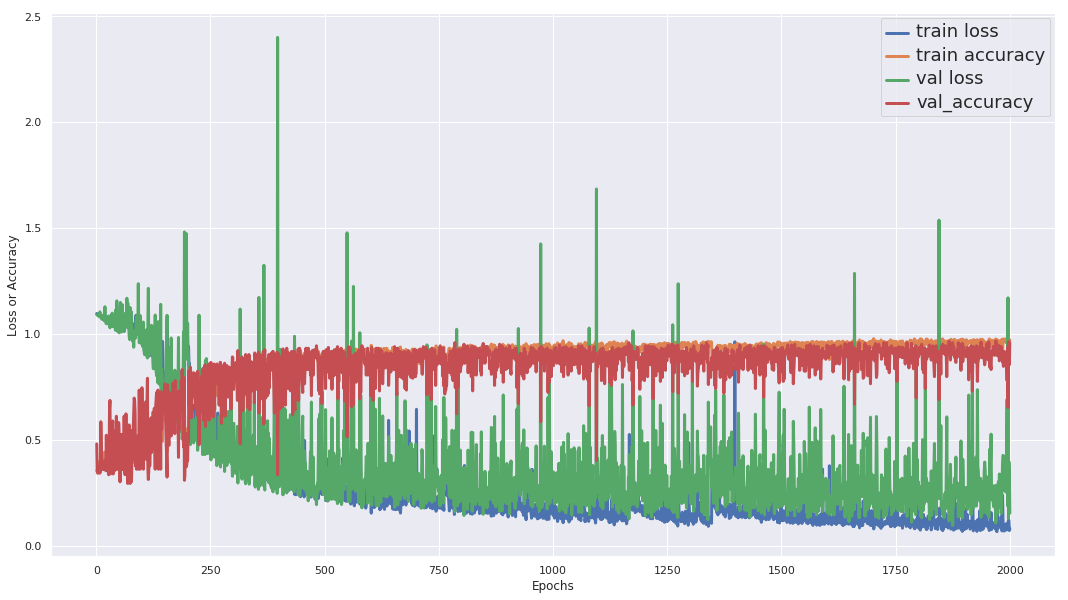

In [16]:
sns.set(font_scale=1)
f, ax = plt.subplots(1, 1, figsize=(18,10))
sns.lineplot(data=plot_df, x='epochs', y='loss', ax=ax, label='train loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='accuracy', ax=ax, label='train accuracy', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_loss', ax=ax, label='val loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_accuracy', ax=ax, label='val_accuracy', linewidth=3)
ax.set_ylabel('Loss or Accuracy')
ax.set_xlabel('Epochs')
plt.setp(ax.get_legend().get_texts(), fontsize='18'); # for legend text

In [ ]:
model.save('./checkpoint')